In [37]:
# generate data
import demap
import scprep
import numpy as np
import phate

In [88]:
data_true = demap.splatter.groups(nGenes=10000, batchCells=1000, nBatches=3, bcv=0, dropout=0, seed=23)
data_noisy = demap.splatter.groups(nGenes=10000, batchCells=1000, nBatches=3, bcv=0.2, dropout=0.5, seed=23)

R[write to console]: Getting parameters...
R[write to console]: Creating simulation object...


{'group_prob': array([0.016, 0.078, 0.012, 0.034, 0.065, 0.036, 0.   , 0.145, 0.146,
       0.024, 0.06 , 0.258, 0.126]), 'nGenes': 10000, 'batchCells': 1000, 'nBatches': 3}


R[write to console]: Simulating library sizes...
R[write to console]: Simulating gene means...
R[write to console]: Simulating group DE...
R[write to console]: Simulating cell means...
R[write to console]: Simulating BCV...
R[write to console]: Simulating counts...
R[write to console]: Simulating dropout (if needed)...
R[write to console]: Sparsifying assays...
R[write to console]: Automatically converting to sparse matrices, threshold = 0.95
R[write to console]: Skipping 'BatchCellMeans': estimated sparse size 1.5 * dense matrix
R[write to console]: Skipping 'BaseCellMeans': estimated sparse size 1.5 * dense matrix
R[write to console]: Skipping 'BCV': estimated sparse size 1.5 * dense matrix
R[write to console]: Skipping 'CellMeans': estimated sparse size 1.5 * dense matrix
R[write to console]: Converting 'TrueCounts' to sparse matrix: estimated sparse size 0.31 * dense matrix
R[write to console]: Converting 'counts' to sparse matrix: estimated sparse size 0.31 * dense matrix
R[write 

{'group_prob': array([0.016, 0.078, 0.012, 0.034, 0.065, 0.036, 0.   , 0.145, 0.146,
       0.024, 0.06 , 0.258, 0.126]), 'nGenes': 10000, 'batchCells': 1000, 'nBatches': 3}


R[write to console]: Simulating library sizes...
R[write to console]: Simulating gene means...
R[write to console]: Simulating group DE...
R[write to console]: Simulating cell means...
R[write to console]: Simulating BCV...
R[write to console]: Simulating counts...
R[write to console]: Simulating dropout (if needed)...
R[write to console]: Sparsifying assays...
R[write to console]: Automatically converting to sparse matrices, threshold = 0.95
R[write to console]: Skipping 'BatchCellMeans': estimated sparse size 1.5 * dense matrix
R[write to console]: Skipping 'BaseCellMeans': estimated sparse size 1.5 * dense matrix
R[write to console]: Skipping 'BCV': estimated sparse size 1.5 * dense matrix
R[write to console]: Skipping 'CellMeans': estimated sparse size 1.5 * dense matrix
R[write to console]: Converting 'TrueCounts' to sparse matrix: estimated sparse size 0.29 * dense matrix
R[write to console]: Converting 'counts' to sparse matrix: estimated sparse size 0.29 * dense matrix
R[write 

In [79]:
# data_true = demap.splatter.paths(nGenes=10000, batchCells=3000, bcv=0, dropout=0, seed=42)
# data_noisy = demap.splatter.paths(nGenes=10000, batchCells=3000, bcv=0.2, dropout=0.5, seed=42)

In [89]:
phate_op = phate.PHATE(n_landmark=5000)
embedding_phate = phate_op.fit_transform(data_noisy)

Calculating PHATE...
  Running PHATE on 1000 observations and 100 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 0.17 seconds.
    Calculating affinities...
    Calculated affinities in 0.04 seconds.
  Calculated graph and diffusion operator in 0.22 seconds.
  Calculating optimal t...
    Automatically selected t = 11
  Calculated optimal t in 0.51 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.26 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 0.79 seconds.
Calculated PHATE in 1.79 seconds.


In [90]:
# run demap
# embedding_phate = demap.embed.PHATE(data_noisy)
demap_phate = demap.DEMaP(data_true, embedding_phate)
# embedding_tsne = demap.embed.TSNE(data_noisy)
# demap_tsne = demap.DEMaP(data_true, embedding_tsne)
# demap_phate, demap_tsne

In [91]:
demap_phate

0.6639807215745527

<Axes: >

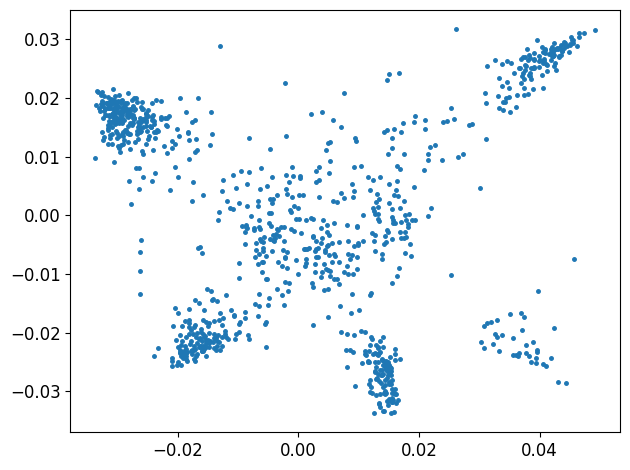

In [92]:
scprep.plot.scatter2d(embedding_phate)

In [84]:
data_noisy

array([[-2.32011389, -4.94104129, -6.85332102, ...,  0.0833934 ,
         3.10494571, -0.43912163],
       [ 9.1916462 , -0.51352377,  0.41998437, ..., -0.20214889,
        -0.80169166,  1.43060781],
       [-3.64476101, -3.17429448,  0.54956188, ..., -1.72013008,
         1.21966667, -0.80138068],
       ...,
       [ 5.10732312, -0.51503483,  1.88246736, ...,  2.60432726,
        -1.34634803,  3.28660104],
       [-7.30017223,  2.7393503 ,  6.28399084, ...,  0.31014121,
        -1.08711648, -1.20809506],
       [-3.70209391, -8.21634731, -3.26506891, ..., -0.61339604,
         1.14718856, -1.2461283 ]])

In [85]:
data_true

array([[-2.79393343,  9.22199704, -0.83351388, ...,  0.07254471,
        -1.55761381,  1.2718249 ],
       [11.52370385,  0.09268503, -1.08668576, ...,  1.03671089,
         0.43997919, -1.09853921],
       [-3.53403835,  1.50650001, -4.81458531, ..., -0.35205453,
         1.21582835, -1.267132  ],
       ...,
       [12.06464305, -0.8312763 , -0.86553861, ...,  1.33206946,
        -0.21436561,  1.75841022],
       [-5.67052442, -6.33828313, -3.62674771, ...,  0.01775755,
        -0.32270302,  0.10959407],
       [-2.32722255,  9.39286398, -1.70846034, ...,  0.72325798,
        -0.01989489,  0.42810976]])

In [93]:
np.savez("../data_notebook/splatter_group3.npz", true=data_true, noisy=data_noisy)

In [87]:
from demap.demap import geodesic_distance
from scipy.spatial.distance import pdist, squareform
from scipy.stats import spearmanr

In [28]:
dist_true = geodesic_distance(data_true, knn=5)
dist_noisy = geodesic_distance(data_noisy, knn=5)

In [29]:
dt = squareform(dist_true)
dn = squareform(dist_noisy)

In [30]:
spearmanr(dt, dn).correlation

0.433274564863266

In [31]:
import graphtools

In [42]:
G = phate_op.graph

In [46]:
dist_noisy = G.shortest_path()
dn = squareform(dist_noisy)

In [47]:
spearmanr(dt, dn).correlation

0.3967017075537664

In [73]:
diff_op_t = np.linalg.matrix_power(phate_op.diff_op, 6)

In [74]:
from scipy.sparse.csgraph import shortest_path

In [75]:
K = (diff_op_t + diff_op_t.T) / 2

In [76]:
dist_noisy = shortest_path(K)
dn = squareform(dist_noisy)

In [77]:
spearmanr(dt, dn).correlation

-0.09302772969185494